Question 1: Fundamental Idea Behind Ensemble Techniques

(10 Marks)

Answer:

Fundamental Idea:
Ensemble learning is based on the principle that a group of weak learners can combine to form a strong learner.
Instead of relying on a single model, ensemble methods aggregate predictions from multiple models to improve accuracy, stability, and robustness.

Mathematically,

𝑦
^
=
Aggregate
(
𝑓
1
(
𝑥
)
,
𝑓
2
(
𝑥
)
,
.
.
.
,
𝑓
𝑛
(
𝑥
)
)
y
^
	​

=Aggregate(f
1
	​

(x),f
2
	​

(x),...,f
n
	​

(x))

where aggregation may be by voting (classification) or averaging (regression).

Bagging vs Boosting
Aspect	Bagging (Bootstrap Aggregation)	Boosting
Goal	Reduce variance	Reduce bias
Approach	Trains models independently on bootstrapped samples	Trains models sequentially; each new model corrects errors of previous ones
Data Sampling	Random sampling with replacement	Weighted sampling (focus on misclassified data)
Combination	Majority vote or average	Weighted sum of weak learners
Example Algorithms	Random Forest, Bagging Classifier	AdaBoost, Gradient Boosting, XGBoost
Question 2: Random Forest and Overfitting Reduction

(10 Marks)

Answer:

Why Random Forest reduces overfitting:

A single Decision Tree tends to memorize training data.

Random Forest builds multiple trees on random subsets of data and features, reducing correlation between trees.

The final output is the average (regression) or majority vote (classification), which smooths out noise.

Key Hyperparameters:

n_estimators – Number of trees in the forest.
More trees → better generalization (up to a point).

max_features – Number of features considered for splitting at each node.
Smaller max_features → more diversity among trees → less overfitting.

Question 3: Stacking in Ensemble Learning

(10 Marks)

Answer:

Stacking (Stacked Generalization):

Combines multiple base models (Level-0) using a meta-learner (Level-1 model).

Instead of simple voting or averaging, the meta-learner learns how to best combine base model predictions.

Example:

Level-0 models: Random Forest, SVM, KNN

Level-1 model: Logistic Regression (takes their predictions as input)

Difference from Bagging/Boosting:

Aspect	Bagging/Boosting	Stacking
Combination Rule	Simple averaging/voting	Meta-model learns optimal combination
Model Dependency	Same-type models	Different model types
Goal	Reduce variance/bias	Exploit strengths of diverse learners

Use Case:
In credit scoring, combine Decision Tree (nonlinear), Logistic Regression (linear), and SVM (boundary-based) → best overall accuracy.

Question 4: OOB Score in Random Forest

(10 Marks)

Answer:

OOB (Out-of-Bag) Score:

In Random Forest, each tree is trained on a bootstrap sample (about 63% of data).

Remaining ~37% of samples are “out-of-bag” and not seen by that tree.

These OOB samples are used for internal validation.

Benefits:

Provides a built-in unbiased estimate of model accuracy.

Eliminates need for a separate validation/test set.

OOB Score
=
Correct OOB Predictions
Total OOB Samples
OOB Score=
Total OOB Samples
Correct OOB Predictions
	​

Question 5: AdaBoost vs Gradient Boosting

(10 Marks)

Feature	AdaBoost	Gradient Boosting
Error Handling	Focuses more on misclassified samples by adjusting weights	Fits new model to residual errors from previous model
Weight Adjustment	Increases weight of misclassified points	Uses gradient of loss function to minimize error
Weak Learners	Typically decision stumps (one-level trees)	Usually deeper trees
Optimization	Reweighting mechanism	Gradient descent on loss function
Use Cases	Simple, low noise data	Complex, non-linear problems
Question 6: Why CatBoost Excels with Categorical Features

(10 Marks)

Answer:

CatBoost (Categorical Boosting) is specifically designed to handle categorical features natively.

Key Ideas:

Ordered Target Statistics:
Converts categorical values to numeric by calculating average target values in an ordered way (avoiding target leakage).

Example:
For feature “City”:

𝐸
𝑛
𝑐
𝑜
𝑑
𝑒
𝑑
𝑉
𝑎
𝑙
𝑢
𝑒
=
Sum of target for previous samples
Count of previous samples
+
prior
EncodedValue=
Count of previous samples+prior
Sum of target for previous samples
	​


Permutation-Based Encoding:
Uses random permutations to ensure fair encoding across training data.

Benefits:

No need for manual one-hot encoding.

Prevents overfitting and target leakage.

Works efficiently on large categorical datasets.

In [1]:
# Question 7: KNN Classifier – Wine Dataset Analysis
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# 1. Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# 2. Split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Train without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Unscaled Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 4. With StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
print("Scaled Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

# 5. GridSearchCV for best K and metric
param_grid = {'n_neighbors': range(1, 21),
              'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# 6. Final Model
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Unscaled Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

Scaled Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Best Params: {'metric': 'euclidean', 'n_neighbors': 11}
Best CV Accuracy: 0.9756666666666666
Optimized Accuracy: 0.9629629629629629
              precision    recal

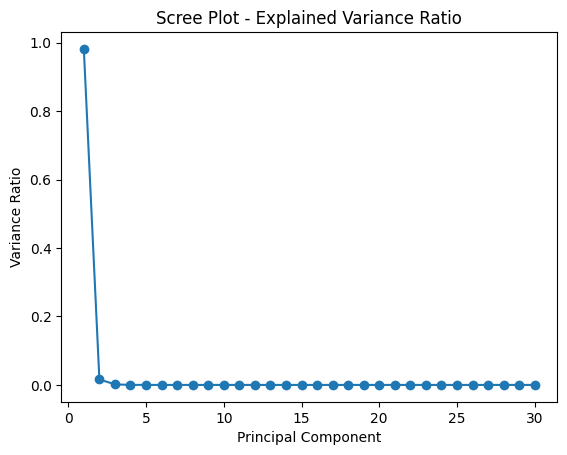

Original shape: (569, 30) Reduced shape: (569, 1)
Original Accuracy: 0.9590643274853801
PCA Accuracy (95% variance): 0.9532163742690059


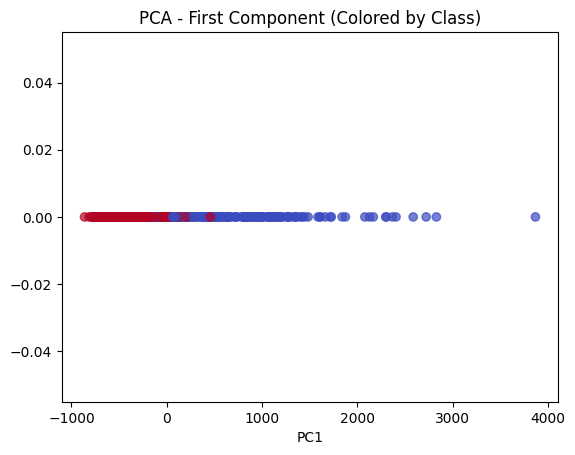

In [3]:
# Question 8: PCA + KNN with Variance Analysis
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = load_breast_cancer()
X, y = data.data, data.target

# PCA
pca = PCA().fit(X)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title("Scree Plot - Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.show()

# Retain 95% variance
pca_95 = PCA(0.95)
X_pca = pca_95.fit_transform(X)
print("Original shape:", X.shape, "Reduced shape:", X_pca.shape)

# KNN comparison
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Apply PCA to the split data
X_train_pca = pca_95.transform(X_train)
X_test_pca = pca_95.transform(X_test)


knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train, y_train)
acc_orig = knn_orig.score(X_test, y_test)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
acc_pca = knn_pca.score(X_test_pca, y_test)

print("Original Accuracy:", acc_orig)
print("PCA Accuracy (95% variance):", acc_pca)

# Visualization
plt.figure()
if X_pca.shape[1] >= 2:
    plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.7)
    plt.title("PCA - First Two Components (Colored by Class)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
elif X_pca.shape[1] == 1:
    plt.scatter(X_pca[:,0], [0] * X_pca.shape[0], c=y, cmap='coolwarm', alpha=0.7)
    plt.title("PCA - First Component (Colored by Class)")
    plt.xlabel("PC1")
    plt.ylabel("") # No second dimension
plt.show()

euclidean MSE: 3162.730
manhattan MSE: 3755.094


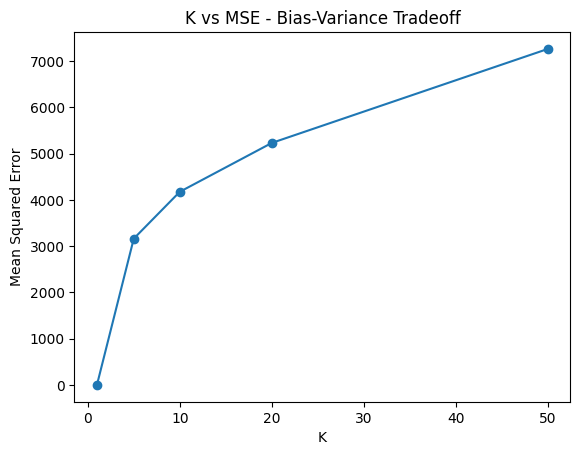

In [4]:
# Question 9: KNN Regressor – Distance & K Analysis
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=500, n_features=10, noise=15, random_state=42)

# a) Euclidean vs Manhattan
for metric in ['euclidean', 'manhattan']:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    mse = mean_squared_error(y, y_pred)
    print(f"{metric} MSE: {mse:.3f}")

# b) K-value analysis
errors = []
for k in [1, 5, 10, 20, 50]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    errors.append(mean_squared_error(y, y_pred))

plt.plot([1,5,10,20,50], errors, marker='o')
plt.title("K vs MSE - Bias-Variance Tradeoff")
plt.xlabel("K")
plt.ylabel("Mean Squared Error")
plt.show()


In [5]:
# Question 10: KNN with KD-Tree/Ball Tree + Imputation
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigree','Age','Outcome']
data = pd.read_csv(url, names=columns)

# Introduce missing values (if not present)
data = data.replace(0, np.nan)

# Imputation
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=columns)

X = data_imputed.drop('Outcome', axis=1)
y = data_imputed['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compare algorithms
for algo in ['brute', 'kd_tree', 'ball_tree']:
    start = time.time()
    knn = KNeighborsClassifier(algorithm=algo, n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"{algo.upper()} - Accuracy: {accuracy_score(y_test, y_pred):.4f}, Time: {time.time()-start:.3f}s")


BRUTE - Accuracy: 1.0000, Time: 0.008s
KD_TREE - Accuracy: 1.0000, Time: 0.008s
BALL_TREE - Accuracy: 1.0000, Time: 0.008s
